In [1]:
# import das bibliotecas

import numpy as np
import networkx as nx

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

from numpy import linalg as LA

import fractions

In [2]:
# connected_watts_strogatz_graph

CWSG = nx.connected_watts_strogatz_graph(100, 25, 0.25, tries=100, seed=None)

# Returns a connected Watts–Strogatz small-world graph.
# Attempts to generate a connected graph by repeated generation of Watts–Strogatz small-world graphs. 
# An exception is raised if the maximum number of tries is exceeded.

#Parameters
#n int The number of nodes
#k int Each node is joined with its k nearest neighbors in a ring topology.
#p float The probability of rewiring each edge
#tries int Number of attempts to generate a connected graph.
#seed integer, random_state, or None (default) Indicator of random number generation state.

# network
G = CWSG

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

In [3]:
print("numero de vertices:", n)
print("numero de arestas:", m)

print("O grafo é conexo:", nx.is_connected(G))

numero de vertices: 100
numero de arestas: 1200
O grafo é conexo: True


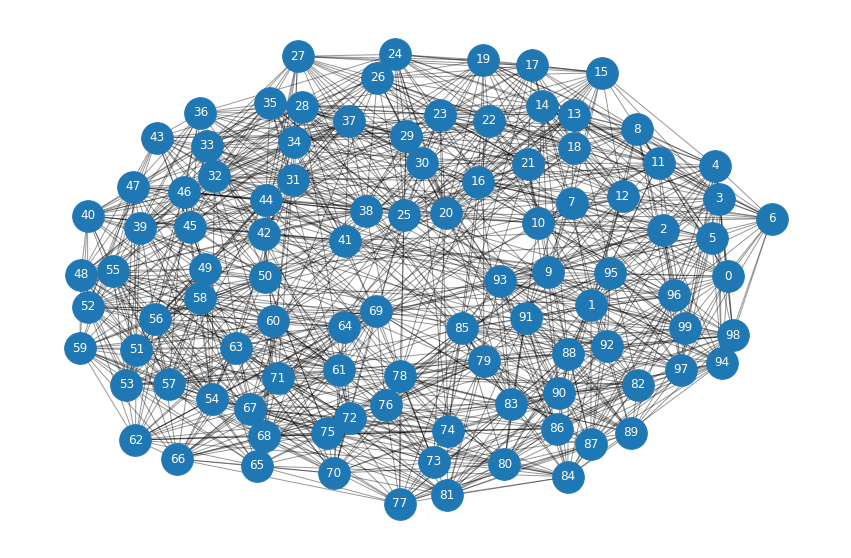

In [4]:
# grafico connected_watts_strogatz_graph

fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = CWSG

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.show()

In [5]:
# barabasi_albert_graph

BAG = nx.barabasi_albert_graph(100, 8, seed=None, initial_graph=None)

# Returns a random graph using Barabási–Albert preferential attachment
# A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree.

# Parameters
# n : int Number of nodes
# m : int Number of edges to attach from a new node to existing nodes
# seed : integer, random_state, or None (default) Indicator of random number generation state

# network
G = BAG

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

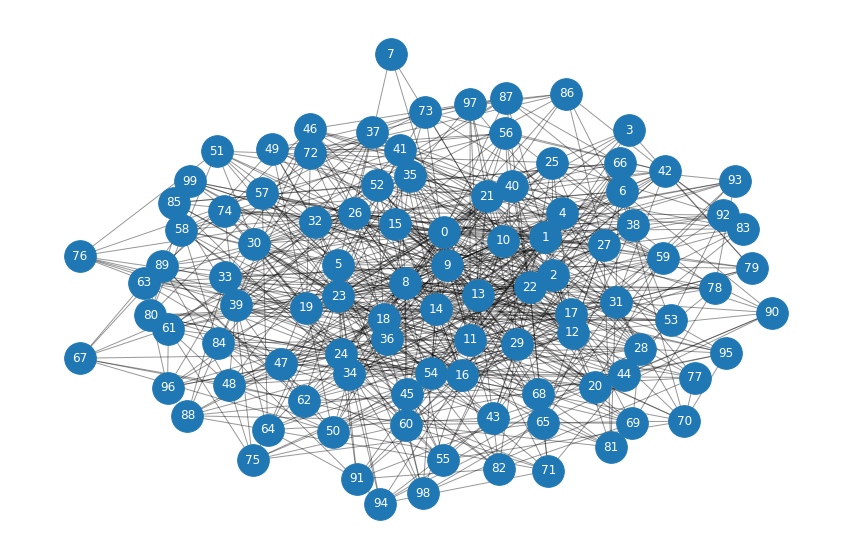

In [6]:
# grafico barabasi_albert_graph

fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = BAG

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.show()

In [8]:
## High school in Marseille
# schoolfriends_vertices.csv and schoolfriends_edgelist.csv data sets 
# This data set represents friendships reported between schoolchildren in a high school in Marseille, France in 2013. 
# The vertex set provides the ID, class and gender of each child, and the edgelist has two types of relationships. 
# The first type is a reported friendship where the from ID reported the to ID as a friend. 
# The second type is a known Facebook friendship between the two IDs

schoolfriends_edgelist = pd.read_csv("../../data/schoolfriends/schoolfriends_edgelist.csv")
schoolfriends_vertices = pd.read_csv("../../data/schoolfriends/schoolfriends_vertices.csv")

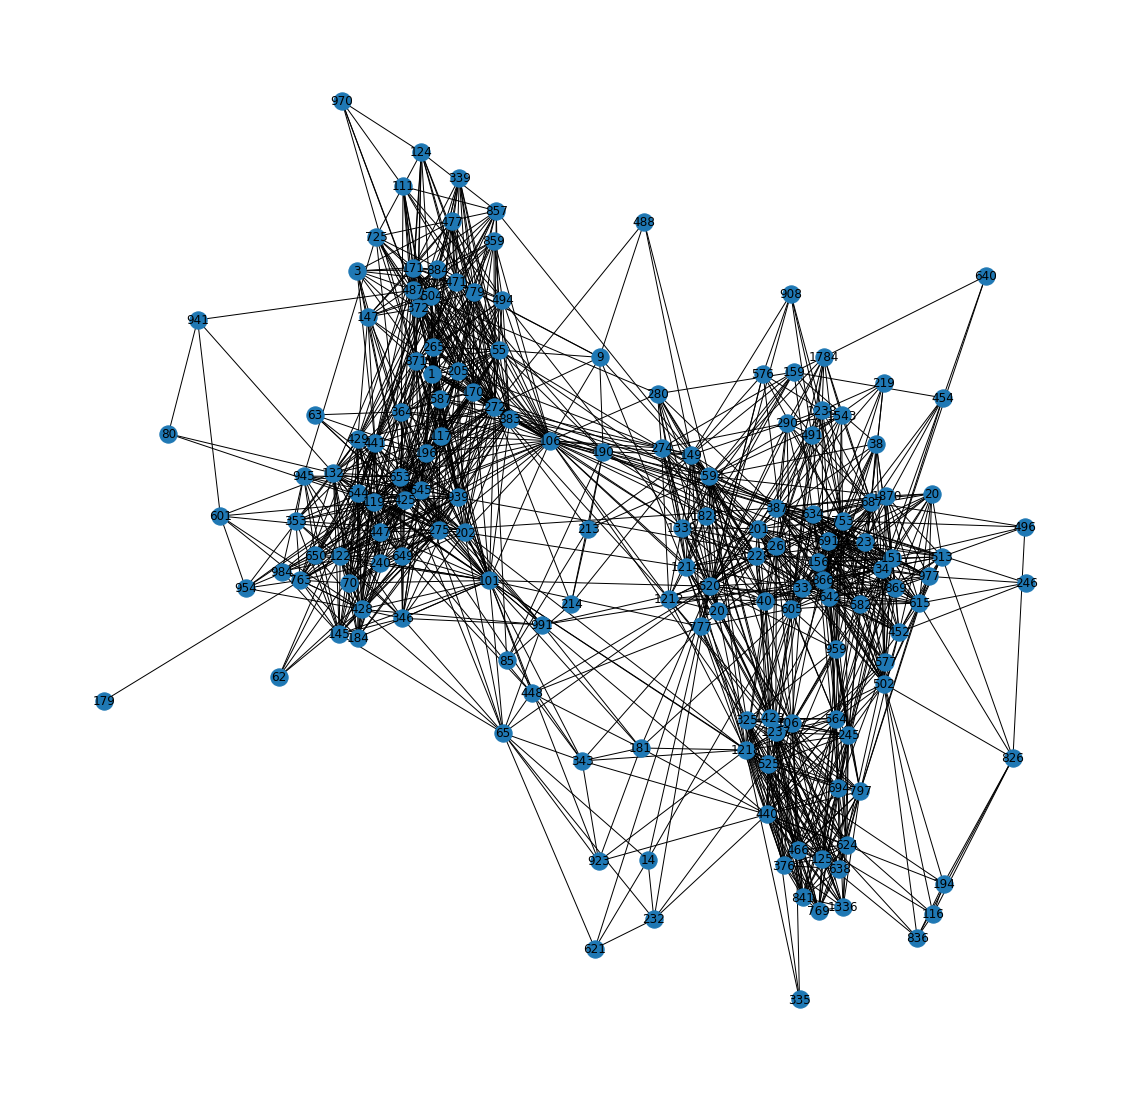

In [9]:
# High school in Marseille: undirected facebook graph

schoolfriends_fb = nx.from_pandas_edgelist(
  df = schoolfriends_edgelist[
    schoolfriends_edgelist.type == 'facebook'
  ],
  source = "from",
  target = "to"
)

pos = nx.spring_layout(schoolfriends_fb)
betCent = nx.betweenness_centrality(schoolfriends_fb, normalized=True, endpoints=True)
node_color = [20000.0 * schoolfriends_fb.degree(v) for v in schoolfriends_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(schoolfriends_fb, 
                 #pos=pos, 
                 #with_labels=False,
                 #node_color=node_color,
                 #node_size=node_size 
                 )
plt.axis('off')
plt.show()

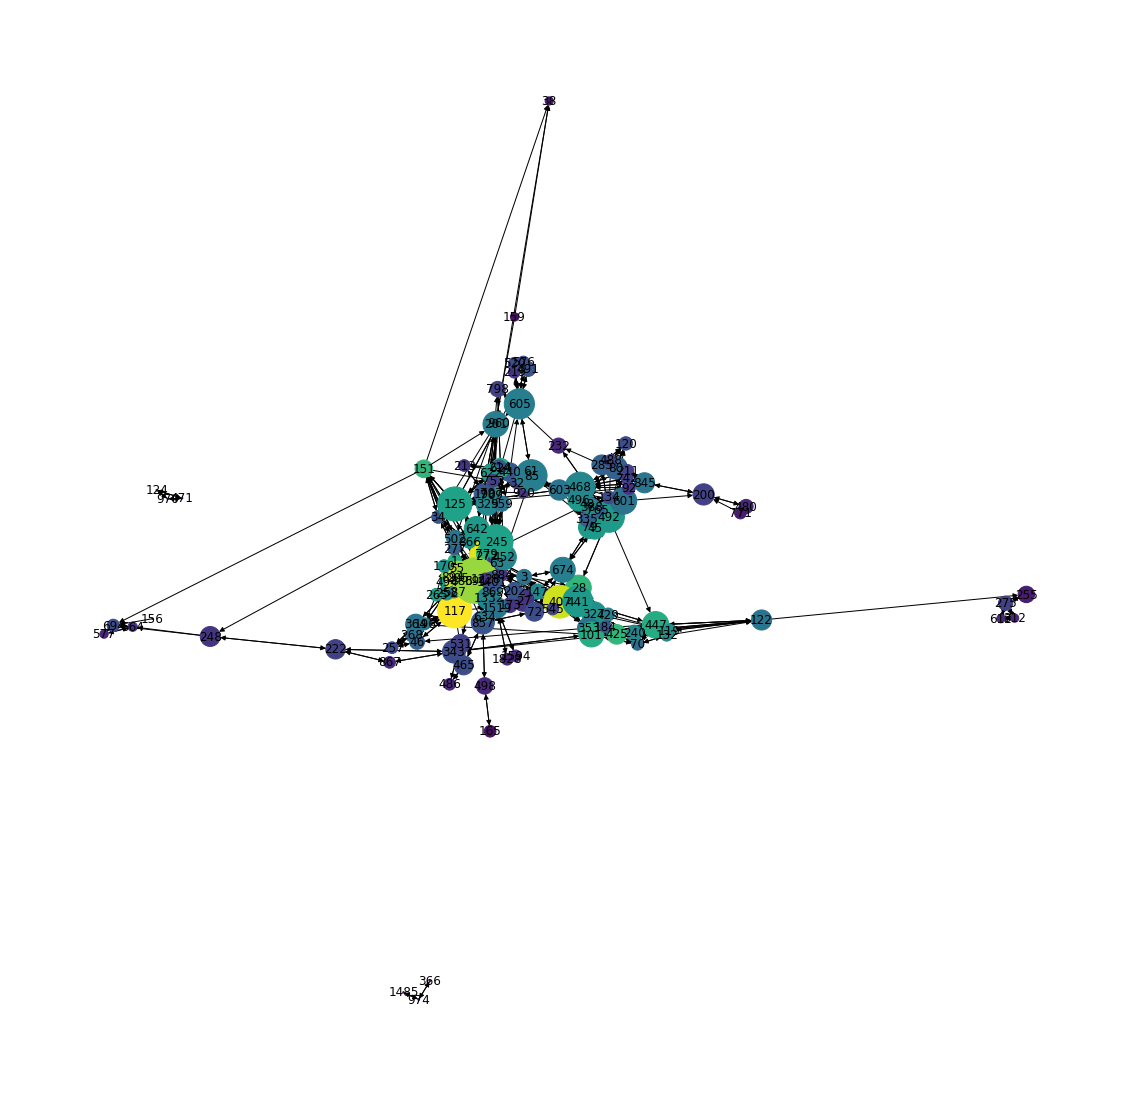

In [10]:
# High school in Marseille: directed reported graph

schoolfriends_rp = nx.from_pandas_edgelist(
  df = schoolfriends_edgelist[schoolfriends_edgelist.type == 'reported'],
  source = "from",
  target = "to",
  create_using=nx.DiGraph()
)

pos = nx.spring_layout(schoolfriends_rp)
betCent = nx.betweenness_centrality(schoolfriends_rp, normalized=True, endpoints=True)
node_color = [20000.0 * schoolfriends_rp.degree(v) for v in schoolfriends_rp]
node_size =  [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))

nx.draw_networkx(schoolfriends_rp, 
                 pos=pos, 
                 #with_labels=False,
                 node_color=node_color,
                 node_size=node_size 
                 )

plt.axis('off')

plt.show()